In [124]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge , SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [74]:
x,y = load_diabetes(return_X_y=True)

In [75]:
x.shape, y.shape

((442, 10), (442,))

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [121]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('r2_score = ',r2_score(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score =  0.452606602161738
RMSE =  53.8532569849144


In [122]:
cross_val = cross_val_score(model,x_train,y_train,cv=10)
cross_val.mean()

0.3932188979202961

In [123]:
model.coef_ , model.intercept_

(array([  37.90031426, -241.96624835,  542.42575342,  347.70830529,
        -931.46126093,  518.04405547,  163.40353476,  275.31003837,
         736.18909839,   48.67112488]),
 151.3456553477407)

### Use Stichastic Gradient Descent regression instead of Linear Regression
Linear Regression uses OLS(ordinary least square) method to calculate coeffs and intercept using matrix inversion in their formulas
coef Beta or weights for predictors(X) = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
                                      = inverse(Xt.X).(Xt.Y)
matrix inversion is highly time and space complexity O(n^3)
So gradient descent techniques uses approximations iteratively to get to the same result or minimizes the loss function

In [126]:
from sklearn.linear_model import SGDRegressor

In [142]:
model = SGDRegressor(penalty='l2',alpha=0.001,learning_rate='constant',eta0=0.3,max_iter=150)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('r2_score = ',r2_score(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
model.coef_ , model.intercept_

r2_score =  0.4550820551741954
RMSE =  53.73134990093688


(array([  41.31136362, -139.50104205,  409.20298011,  271.51418235,
         -35.89414942,  -73.19664184, -190.65739502,  137.31942548,
         301.4672822 ,  120.79589943]),
 array([152.60623529]))

### Use sklearn Ridge instead of LinearRegression

In [116]:
from sklearn.linear_model import Ridge

 ### alpha is the hyperparameter lambda which minimizes loss function by shrinking the valye of coeff estimate (betas) towards 0

In [118]:
model = Ridge(alpha=0.1)
model.fit(x_train,y_train)
y_pred1 = model.predict(x_test)
print('r2_score after L2 norm= ',r2_score(y_test,y_pred1))
print('RMSE after L2 norm = ', np.sqrt(mean_squared_error(y_test,y_pred1)))
model.coef_ , model.intercept_

r2_score after L2 norm=  0.46085316782973296
RMSE after L2 norm =  53.446063761235834


(array([  42.85374471, -205.49571833,  505.08633402,  317.09877365,
        -108.49829825,  -86.2387599 , -190.36567438,  151.7067317 ,
         392.28728164,   79.90836219]),
 151.4586024338539)

### Use ridge regression with Gradient descent
normal ridge regression uses matrix inversion in it's formula. complexity of matrix inversion is O(n^3)
gradient descent is approximation technique to find coefficient estimates and intercept

In [119]:
rig_gd = Ridge(alpha=0.1,solver='sparse_cg')
rig_gd.fit(x_train,y_train)
y_pred = rig_gd.predict(x_test)
print('r2_score after L2 norm with GD= ',r2_score(y_test,y_pred))
print('RMSE after L2 norm with GD = ', np.sqrt(mean_squared_error(y_test,y_pred)))
rig_gd.coef_ , rig_gd.intercept_

r2_score after L2 norm with GD=  0.4608077152906459
RMSE after L2 norm with GD =  53.44831658733066


(array([  42.80138878, -205.35491384,  505.40715919,  317.05363419,
        -108.40557153,  -86.64138479, -189.81834342,  152.41422522,
         391.90723493,   79.90088916]),
 151.4586265862303)

### Create ridge class replicating sklearn functionality

In [106]:
class RidgeRegressor:
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        I = np.identity(x_train.shape[1]) #no. of columns in x
        #make 1st element of I as 0 as used in sklearn implementation
        I[0][0] = 0
        W = (np.linalg.inv(np.dot(x_train.T,x_train) + self.alpha*I)).dot(np.dot(x_train.T,y_train))
        self.intercept_ = W[0]
        self.coef_ = W[1:]
        
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

In [107]:
ridge = RidgeRegressor(alpha=0.5)
ridge.fit(x_train,y_train)

In [108]:
y_pred1 = ridge.predict(x_test)
print('r2_score after L2 norm= ',r2_score(y_test,y_pred1))
print('RMSE after L2 norm = ', np.sqrt(mean_squared_error(y_test,y_pred1)))

r2_score after L2 norm=  0.44939776179516744
RMSE after L2 norm =  54.010871230541056


In [109]:
ridge.coef_

array([  45.64198359, -123.52367534,  376.15029923,  248.41398542,
        -26.89914062,  -59.71740905, -172.54986164,  131.89575774,
        289.15947557,  112.14623689])

In [110]:
ridge.intercept_

151.900529209756

### create pipeline with ridge regression instead of linear with different values of lambda

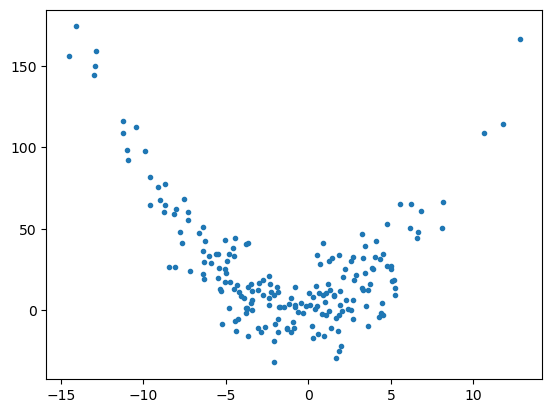

In [32]:
x = 5 * np.random.randn(200,1) - 1 #randn takes a sample of 200 numbers from normal distribution
#y = 0.9x2 + 0.8x + 2 + random noise -  polynomial equation
y = 0.9*x*x + 0.8*x  + 1 + 15*np.random.randn(200,1)
plt.plot(x,y,'.')

In [65]:
pipe = Pipeline([('poly',PolynomialFeatures(degree=2)),
                 ('L2',Ridge(alpha=1000))])
pipe.fit(x,y)
y_pred = pipe.predict(x)
cross_val = cross_val_score(pipe,x,y,cv=10)
cross_val.mean()

0.82499523100458

In [50]:
pipe.named_steps['L2'].get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [66]:
pipe.named_steps['L2'].coef_

array([[0.        , 0.61252929, 0.89133114]])

In [59]:
pipe.named_steps['L2'].intercept_

array([1.55455999])

In [ ]:
params =  { 'poly__degree':[3,10,16],
              'L2__alpha':[0,0.1,0.001,100]
            }
grid = GridSearchCV(pipe,params,cv=5)
grid.fit(x,y)
y_pred = grid.predict(x)
print('best score = ',grid.best_score_)
print('best param = ',grid.best_params_)


In [62]:
pipe.named_steps['L2'].coef_ #as we increase value of lambda , overfitting starts taking place.
#our model gets simpler and simpler being penalized by factor of lambda (alpha) for it's flexibility

array([[0.        , 0.77916036, 0.90413394]])